# ***Q8 Reducing the Number of Intensity Levels in an Image***


##(a) Write a computer program capable of reducing the number of intensity levels in animage from 256 to 2, in integer powers of 2. The desired number of intensity levels needs to be a variable input to your program.

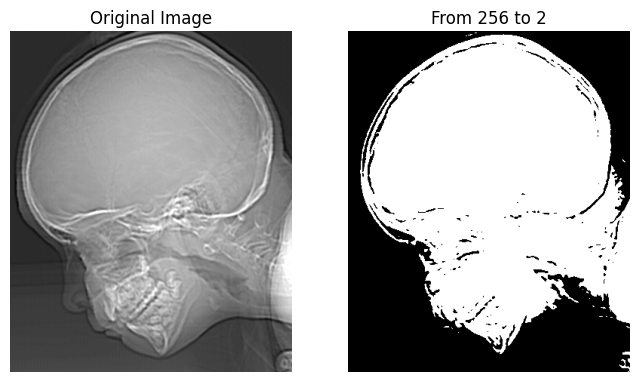

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def reduce_intensity_levels(image_path, levels):
    # 讀取圖像
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    # 計算每個強度級別的間隔
    interval = 256 // levels
    # 減少強度級別
    reduced_image = (image // interval) * interval
    # 顯示原始圖像
    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')
    # 顯示處理後的圖像
    plt.subplot(1, 2, 2)
    plt.imshow(reduced_image, cmap='gray')
    plt.title('From 256 to 2')
    plt.axis('off')
# 輸入圖像的檔案路徑和所需的強度級別
image_path = "/content/Fig0221(a)(ctskull-256).tif"
desired_levels = 2

# 呼叫函式進行圖像處理
reduce_intensity_levels(image_path, desired_levels)

# (b) Download Fig. 2.21(a) from the course web site and duplicate the results shown in Fig. 2.21 of the book.

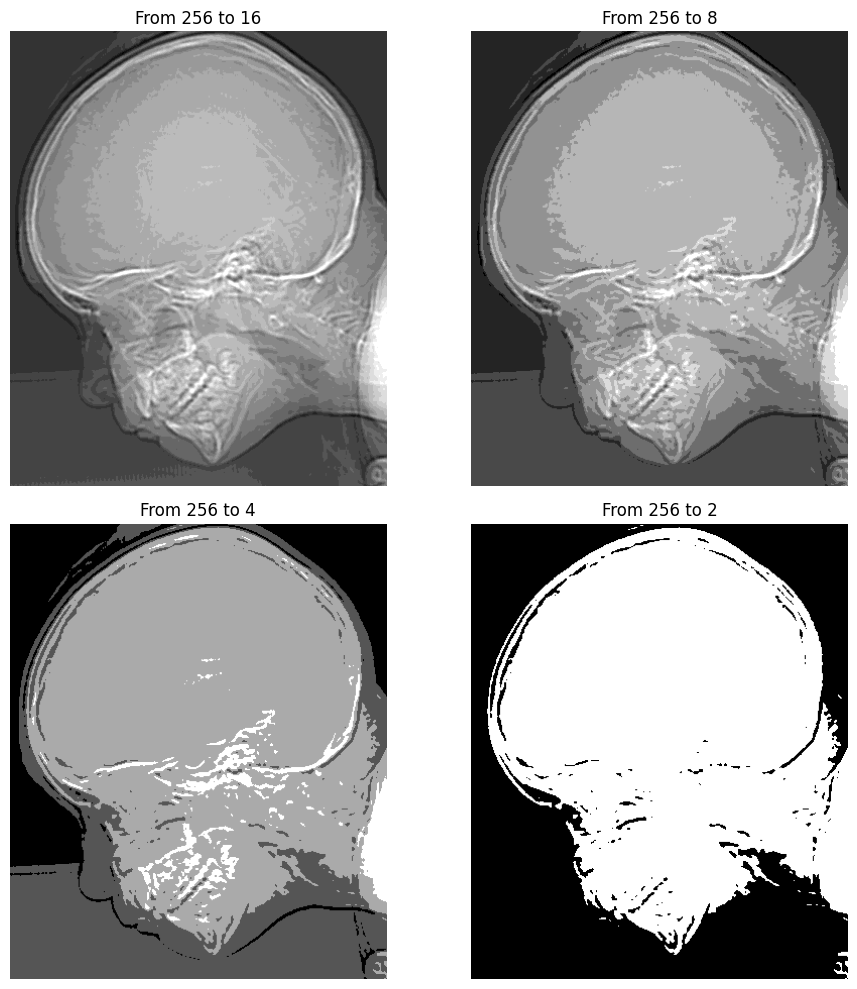

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def reduce_intensity_levels(image_path, levels):
    # 讀取圖像
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # 計算每個強度級別的間隔
    interval = 256 // levels

    # 減少強度級別
    reduced_image = (image // interval) * interval

    return reduced_image

# 輸入圖像的檔案路徑和所需的強度級別
image_path = "/content/Fig0221(a)(ctskull-256).tif"
desired_levels = [16, 8, 4, 2]

# 呼叫函式進行圖像處理
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

for i, levels in enumerate(desired_levels):
    reduced_image = reduce_intensity_levels(image_path, levels)
    row = i // 2
    col = i % 2
    axs[row, col].imshow(reduced_image, cmap='gray')
    axs[row, col].set_title(f'From 256 to {levels}')
    axs[row, col].axis('off')

plt.tight_layout()
plt.show()

# Q9. Zooming and Shrinking Images by Pixel Replication

## (a)Write a computer program capable of zooming and shrinking an image by pixel replication. Assume that the desired zoom/shrink factors are integers.

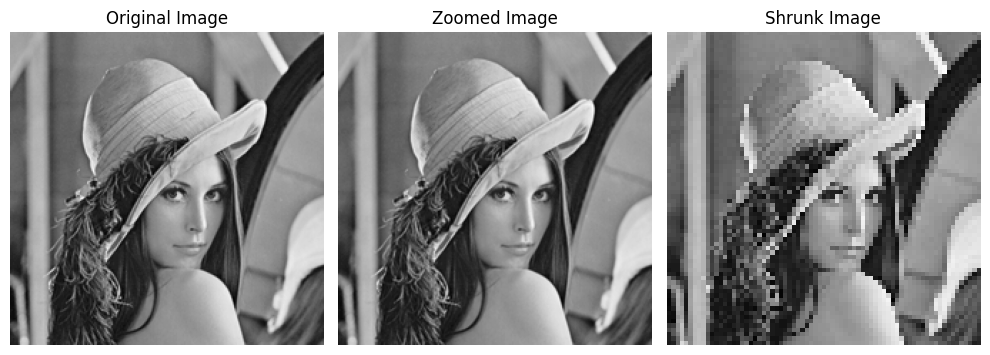

In [ ]:
import cv2
from matplotlib import pyplot as plt

def zoom_image(image, zoom_factor):
    height, width = image.shape[:2]
    zoomed_height = height * zoom_factor
    zoomed_width = width * zoom_factor

    zoomed_image = cv2.resize(image, (zoomed_width, zoomed_height), interpolation=cv2.INTER_NEAREST)
    return zoomed_image

def shrink_image(image, shrink_factor):
    height, width = image.shape[:2]
    shrunk_height = height // shrink_factor
    shrunk_width = width // shrink_factor

    shrunk_image = cv2.resize(image, (shrunk_width, shrunk_height), interpolation=cv2.INTER_NEAREST)
    return shrunk_image

# Load the image
image = cv2.imread('/content/Lena.png', cv2.IMREAD_GRAYSCALE)

# Zoom the image by pixel replication
zoom_factor = 20  # Adjust the zoom factor as needed
zoomed_image = zoom_image(image, zoom_factor)

# Shrink the image by pixel replication
shrink_factor = 3  # Adjust the shrink factor as needed
shrunk_image = shrink_image(image, shrink_factor)

# Display the zoomed and shrunk images
plt.figure(figsize=(10, 8))
plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Zoomed Image')
plt.imshow(zoomed_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Shrunk Image')
plt.imshow(shrunk_image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

## (b) Download Fig. 2.20(a) from the course web site and use your program to shrink the image by a factor of 12.

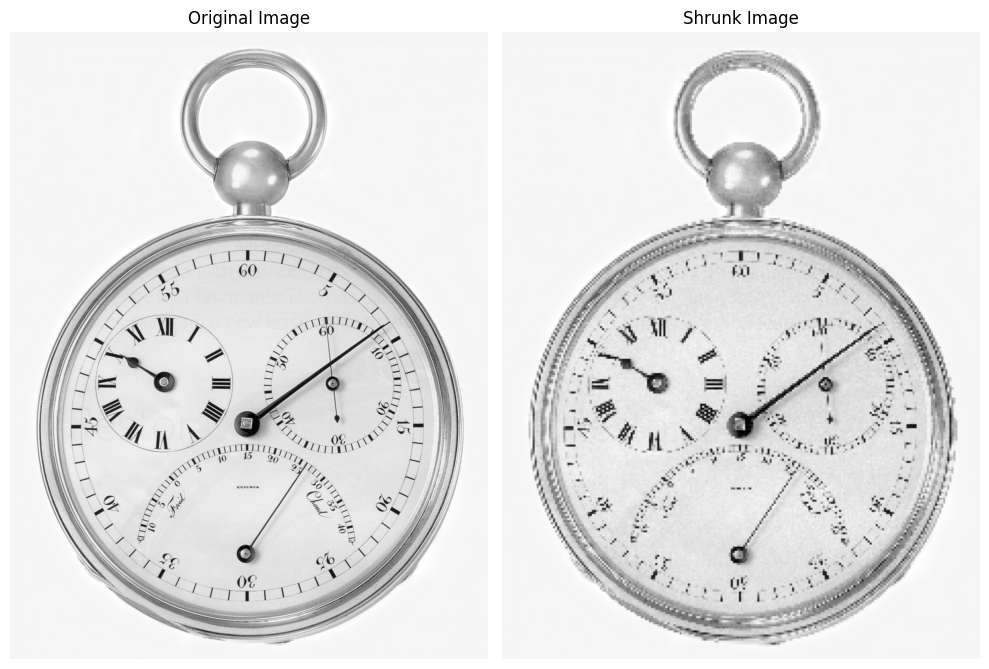

True

In [ ]:
import cv2
from matplotlib import pyplot as plt

def shrink_image(image, shrink_factor):
    height, width = image.shape[:2]
    shrunk_height = height // shrink_factor
    shrunk_width = width // shrink_factor

    shrunk_image = cv2.resize(image, (shrunk_width, shrunk_height), interpolation=cv2.INTER_NEAREST)
    return shrunk_image

# Load the image
image = cv2.imread('/content/Fig0220(a)(chronometer 3692x2812  2pt25 inch 1250 dpi).tif', cv2.IMREAD_GRAYSCALE)

# Shrink the image by pixel replication
shrink_factor = 12  # Adjust the shrink factor as needed
shrunk_image = shrink_image(image, shrink_factor)

# Display the original and shrunk images
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Shrunk Image')
plt.imshow(shrunk_image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()
# Save the shrunk image
cv2.imwrite('/content/shrunk_clock.png', shrunk_image)

## (c) Use your program to zoom the image in (b) back to the resolution of the original.Explain the reasons for their differences.
ans:會有落差的原因是因為當進行縮小或放大時會在進行內插的時候丟失一些特徵值，導致有些細節被丟失，所以就算縮放回原本大小也會和原圖產生落差。

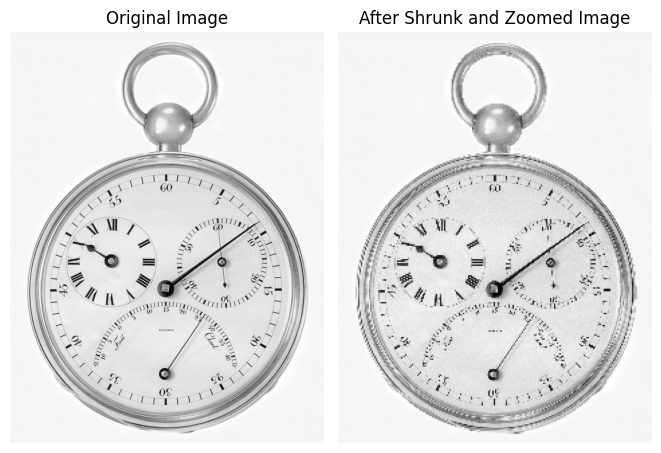

In [ ]:
import cv2
from matplotlib import pyplot as plt

def zoom_image(image, zoom_factor):
    height, width = image.shape[:2]
    zoomed_height = height * zoom_factor
    zoomed_width = width * zoom_factor

    zoomed_image = cv2.resize(image, (zoomed_width, zoomed_height), interpolation=cv2.INTER_NEAREST)
    return zoomed_image

# Load the image
image = cv2.imread('/content/shrunk_clock.png', cv2.IMREAD_GRAYSCALE)
origin = cv2.imread('/content/Fig0220(a)(chronometer 3692x2812  2pt25 inch 1250 dpi).tif', cv2.IMREAD_GRAYSCALE)
# Zoom the image by pixel replication
zoom_factor = 12  # Adjust the zoom factor as needed
zoomed_image = zoom_image(image, zoom_factor)

# Display the zoomed and shrunk images
plt.figure(figsize=(10, 8))
plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(origin, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('After Shrunk and Zoomed Image')
plt.imshow(zoomed_image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

## Q10 Image Rotation, Scaling, Translation and Intensity Interpolation

## (a)Write a computer program capable of rotating, scaling, and translating an image by specified degree, ratio, and pixels. The rotation degree, scaling ratio, and translating pixels need to be variable inputs to your program.

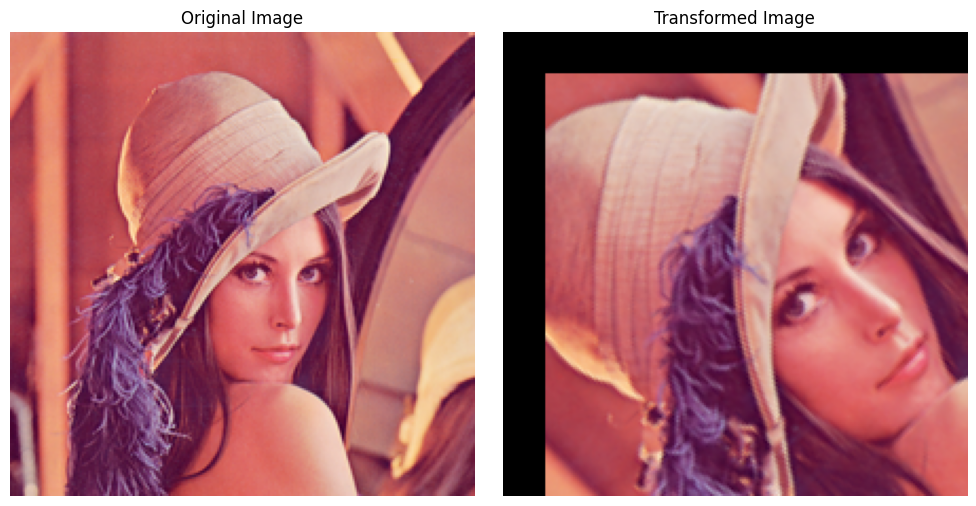

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def transform_image(image_path, rotation_degree, scaling_ratio, translation_pixels):
    # Read the image
    image = cv2.imread(image_path)

    # Get image dimensions
    height, width = image.shape[:2]

    # Calculate the rotation center
    center = (width // 2, height // 2)

    # Define the rotation matrix
    rotation_matrix = cv2.getRotationMatrix2D(center, rotation_degree, scaling_ratio)

    # Perform the rotation
    rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))

    # Define the translation matrix
    translation_matrix = np.float32([[1, 0, translation_pixels[0]], [0, 1, translation_pixels[1]]])

    # Perform the translation
    translated_image = cv2.warpAffine(rotated_image, translation_matrix, (width, height))

    # Display the original and transformed images
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(translated_image, cv2.COLOR_BGR2RGB))
    plt.title("Transformed Image")
    plt.axis("off")

    plt.tight_layout()
    plt.show()


image_path = "/content/Lena.png"

# Specify the rotation degree, scaling ratio, and translation pixels
rotation_degree = 45
scaling_ratio = 1.5
translation_pixels = (20,20)

# Apply the transformations to the image
transform_image(image_path, rotation_degree, scaling_ratio, translation_pixels)

### (b) Download Fig. 2.36 (a) from the course web site and rotate the image 23 ﾟ clockwise,scale it to 2/3 of original size, and shift it by 18 and 22 pixels in x and y directions,respectively. Show the results using three interpolation approaches mentioned in thetextbook. Please also zoom in the results to compare the differences as shown in Figs.2.36 (b) – (d).

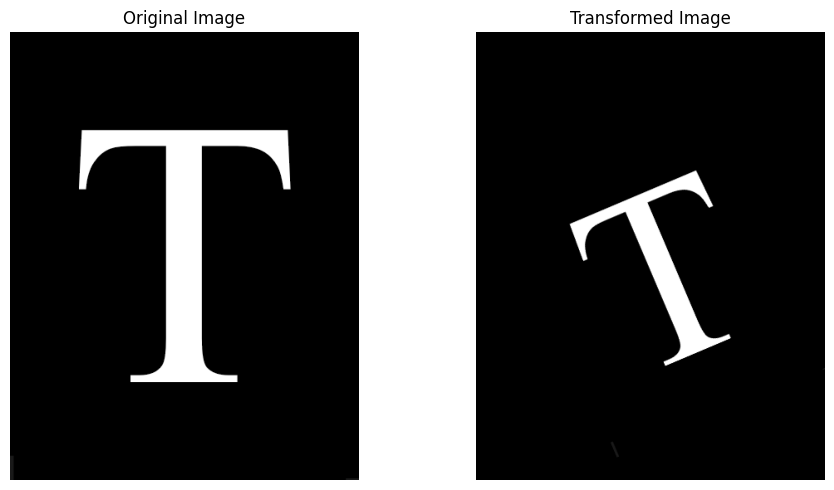

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def transform_image(image_path, rotation_degree, scaling_ratio, translation_pixels):
    # Read the image
    image = cv2.imread(image_path)

    # Get image dimensions
    height, width = image.shape[:2]

    # Calculate the rotation center
    center = (width // 2, height // 2)

    # Define the rotation matrix
    rotation_matrix = cv2.getRotationMatrix2D(center, rotation_degree, scaling_ratio)

    # Perform the rotation
    rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))

    # Define the translation matrix
    translation_matrix = np.float32([[1, 0, translation_pixels[0]], [0, 1, translation_pixels[1]]])

    # Perform the translation
    translated_image = cv2.warpAffine(rotated_image, translation_matrix, (width, height))

    # Display the original and transformed images
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(translated_image, cv2.COLOR_BGR2RGB))
    plt.title("Transformed Image")
    plt.axis("off")

    plt.tight_layout()
    plt.show()


image_path = "/content/Fig0236(a)(letter_T).tif"

# Specify the rotation degree, scaling ratio, and translation pixels
rotation_degree = 23
scaling_ratio = 2/3
translation_pixels = (18,22)

# Apply the transformations to the image
transform_image(image_path, rotation_degree, scaling_ratio, translation_pixels)

### 使用課本介紹的三種內插法進行比較

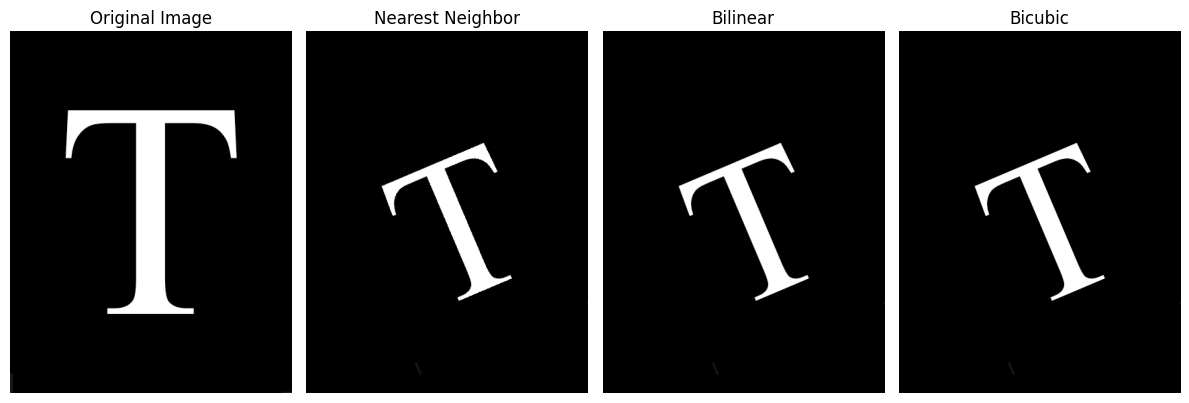

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def transform_image(image_path, rotation_degree, scaling_ratio, translation_pixels, interpolation):
    # Read the image
    image = cv2.imread(image_path)

    # Get image dimensions
    height, width = image.shape[:2]

    # Calculate the rotation center
    center = (width // 2, height // 2)

    # Define the rotation matrix
    rotation_matrix = cv2.getRotationMatrix2D(center, rotation_degree, scaling_ratio)

    # Perform the rotation
    rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height), flags=interpolation)

    # Define the translation matrix
    translation_matrix = np.float32([[1, 0, translation_pixels[0]], [0, 1, translation_pixels[1]]])

    # Perform the translation
    translated_image = cv2.warpAffine(rotated_image, translation_matrix, (width, height), flags=interpolation)

    return translated_image

# Specify the image file path
image_path = "/content/Fig0236(a)(letter_T).tif"

# Specify the rotation degree, scaling ratio, and translation pixels
rotation_degree = 23
scaling_ratio = 2/3
translation_pixels = (18,22)

# Apply the transformations to the image using different interpolation methods
nearest_neighbor_image = transform_image(image_path, rotation_degree, scaling_ratio, translation_pixels, cv2.INTER_NEAREST)
bilinear_image = transform_image(image_path, rotation_degree, scaling_ratio, translation_pixels, cv2.INTER_LINEAR)
bicubic_image = transform_image(image_path, rotation_degree, scaling_ratio, translation_pixels, cv2.INTER_CUBIC)

# Display the images
plt.figure(figsize=(12, 4))

plt.subplot(1, 4, 1)
plt.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 4, 2)
plt.imshow(cv2.cvtColor(nearest_neighbor_image, cv2.COLOR_BGR2RGB))
plt.title("Nearest Neighbor")
plt.axis("off")

plt.subplot(1, 4, 3)
plt.imshow(cv2.cvtColor(bilinear_image, cv2.COLOR_BGR2RGB))
plt.title("Bilinear")
plt.axis("off")

plt.subplot(1, 4, 4)
plt.imshow(cv2.cvtColor(bicubic_image, cv2.COLOR_BGR2RGB))
plt.title("Bicubic")
plt.axis("off")

plt.tight_layout()
plt.show()

## 比較三者邊緣細節

Nearest Neighbor:
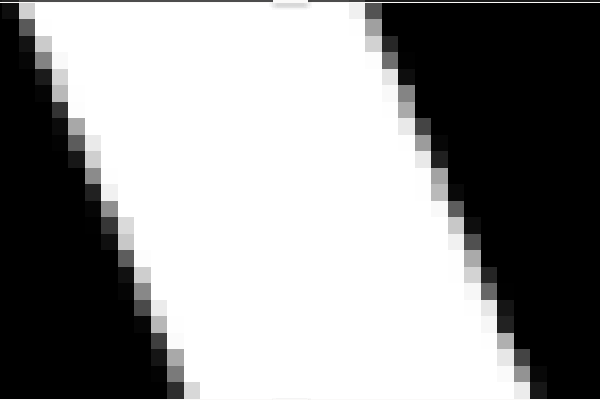

Bilinear:
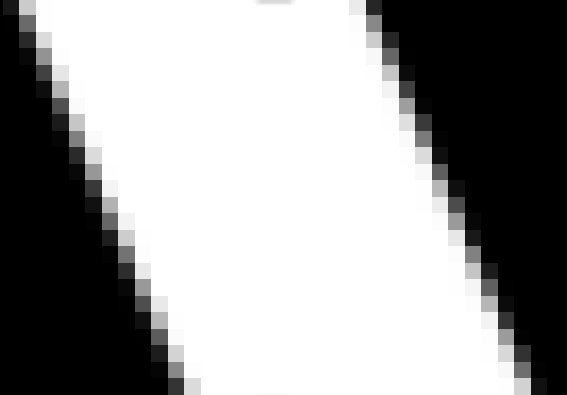

Bicubic:
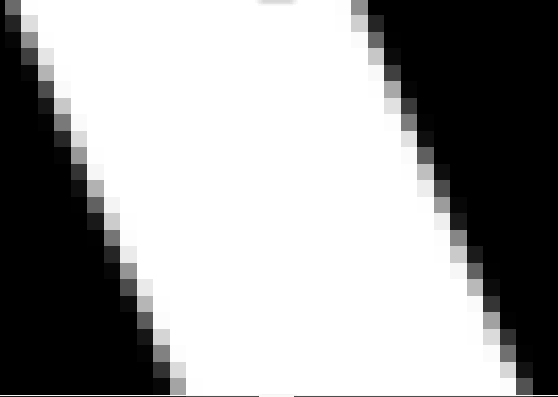